# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [11]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:08<00:00, 850.46it/s]


In [12]:
# after preprocesing

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [13]:
# similarly you can preprocess the titles also
project_title=project_data['project_title']
import re
preprocessed_title=[]
for i in project_title:
    i=i.replace('\\r',"")
    i=i.replace('\\n',"")
    i=i.replace('\\t',"")
    i=i.replace("'\'","")
    i=i.replace(":","")
    i=i.replace("'","")
    i=i.replace("-","")
    i=i.replace(",","")
    i=i.replace(".","")
    i=i.replace("'""'","")
    clean=re.sub('[^A-Za-z0-9]+'," ",i)
    word = ' '.join(e for e in clean.split() if e not in stopwords)
    preprocessed_title.append(word.lower().strip())

In [14]:
#https://simmonhessner.de/lammitize-whole-sentences-with-python-and-nltks-wordnetlemmatizer/
#lemmatizing the preprocessed_title
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemmatize_sentence(sentence):
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    wn_tagged=map(lambda x:(x[0],nltk2wn_tag(x[1])),nltk_tagged)
    res_words=[]
    for word,tag in wn_tagged:
        if tag is None:
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word,tag))
    return " ".join(res_words)
from tqdm import tqdm
clean_title=[]
for word in tqdm(preprocessed_title):
    i=lemmatize_sentence(word)
    clean_title.append(i)

100%|██████████| 109248/109248 [03:38<00:00, 500.97it/s]


## 1.5 Preparing data for models

In [15]:
project_data['project_title']=clean_title
project_data['essay']=preprocessed_essays

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Naive Bayes

<ol>
    <li><strong> Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Finding the best hyper parameter which will give the maximum AUC value</li>
    <li>Use gridsearch cv or randomsearch cv<li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Finding  the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>plot the performance of model both on train data and cross validation data for each hyper parameter.
    <li>Once after found the best hyper parameter,train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <li>Along with plotting ROC curve, print the confusion matrix with predicted and original labels of test data points. 
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>Summarize the results at the end of the notebook, summarize it in the table format.
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [16]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

In [17]:

from sklearn.model_selection import train_test_split
project_data=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay','project_is_approved', 'price', 'quantity']]
project_data=project_data.dropna()
y=project_data['project_is_approved']
x=project_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.1,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_cv.shape)
print(y_cv.shape)
print(x_train.columns)   

(68823, 11)
(68823,)
(32774, 11)
(32774,)
(7648, 11)
(7648,)
Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'],
      dtype='object')


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

#### Bow of Essay and project title

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
def bow(data): 
    text_bow = vectorizer.transform(data)
    return text_bow
vectorizer.fit(x_train['essay'])
bow_train_essay  = bow(x_train['essay'])
bow_test_essay   = bow(x_test['essay'])
bow_cv_essay     = bow(x_cv['essay'])
bow_essay_feature_name = vectorizer.get_feature_names()
#bow of v
vectorizer.fit(x_train['project_title'])
bow_train_title=bow(x_train['project_title'])
bow_test_title=bow(x_test['project_title'])
bow_cv_title=bow(x_cv['project_title'])
bow_title_feature_name = vectorizer.get_feature_names()

In [19]:
print(bow_cv_title.shape)
print(bow_train_title.shape)
print(bow_test_title.shape)
print(bow_cv_essay.shape)
print(bow_train_essay.shape)
print(bow_test_essay.shape)

(7648, 2159)
(68823, 2159)
(32774, 2159)
(7648, 13888)
(68823, 13888)
(32774, 13888)


#### TF-IDF of Essay and project title feature

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['essay'])
tfidf_train_essay = vectorizer.transform(x_train['essay'])
tfidf_test_essay = vectorizer.transform(x_test['essay'])
tfidf_cv_essay = vectorizer.transform(x_cv['essay'])
tfidf_essay_feature= vectorizer.get_feature_names()
print(tfidf_train_essay.shape)
print(tfidf_test_essay.shape)
print(tfidf_cv_essay.shape)

(68823, 13888)
(32774, 13888)
(7648, 13888)


In [21]:
vectorizer.fit(x_train['project_title'])
tfidf_train_title = vectorizer.transform(x_train['project_title'])
tfidf_test_title = vectorizer.transform(x_test['project_title'])
tfidf_cv_title = vectorizer.transform(x_cv['project_title'])
tfidf_title_feature = vectorizer.get_feature_names()
print(tfidf_train_title.shape)
print(tfidf_test_title.shape)
print(tfidf_cv_title.shape)

(68823, 2159)
(32774, 2159)
(7648, 2159)


#### One Hot encoding of School state feature

In [22]:
 my_counter=Counter()
for grade in x_train['school_state'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sort_project_grade_cat=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sort_project_grade_cat),lowercase=False, binary=True)
vectorizer.fit(x_train['school_state'])
    # vectorizing 
school_state_one_hot_train = vectorizer.transform(x_train['school_state'])
school_state_one_hot_cv    = vectorizer.transform(x_cv['school_state'])
school_state_one_hot_test  = vectorizer.transform(x_test['school_state'])
school_state_feature_name  = vectorizer.get_feature_names()

#### One hot encoding of Clean subcategories feature

In [23]:
my_counter=Counter()
for grade in x_train['clean_subcategories'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_subcategories'].values)


subcategories_one_hot_train=vectorizer.transform(x_train['clean_subcategories'])
subcategories_one_hot_test=vectorizer.transform(x_test['clean_subcategories'])
subcategories_one_hot_cv=vectorizer.transform(x_cv['clean_subcategories'])
subcategories_feature_name=vectorizer.get_feature_names()

#### One hot encoding of  clean categories feature

In [24]:
my_counter=Counter()
for grade in x_train['clean_categories'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_categories'].values)

categories_one_hot_train=vectorizer.transform(x_train['clean_categories'].values)
categories_one_hot_test=vectorizer.transform(x_test['clean_categories'].values)
categories_one_hot_cv=vectorizer.transform(x_cv['clean_categories'].values)
categories_feature_name=vectorizer.get_feature_names()

#### One hot encoding of project grade category

In [25]:
my_counter=Counter()
for grade in x_train['project_grade_category'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
if 'Grades' in dict_my_counter:
    dict_my_counter.pop('Grades')
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['clean_categories'].values)

grade_cat_one_hot_train=vectorizer.transform(x_train['project_grade_category'])
grade_cat_one_hot_test=vectorizer.transform(x_test['project_grade_category'])
grade_cat_one_hot_cv=vectorizer.transform(x_cv['project_grade_category'])
grade_feature_name= vectorizer.get_feature_names()

#### One hot encoding of teacher prefix

In [26]:
my_counter=Counter()
for grade in x_train['teacher_prefix'].values:
    my_counter.update(grade.split())
dict_my_counter=dict(my_counter)
sorted_sub_cat_dict=dict(sorted(dict_my_counter.items(), key=lambda kv: kv[1]))
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),\
lowercase=False, binary= True) 
vectorizer.fit(x_train['teacher_prefix'].values)

teacher_prefix_one_hot_train=vectorizer.transform(x_train['teacher_prefix'])
teacher_prefix_one_hot_test=vectorizer.transform(x_test['teacher_prefix'])
teacher_prefix_one_hot_cv=vectorizer.transform(x_cv['teacher_prefix'])
teacher_pre_feature_name=vectorizer.get_feature_names()

#### Normalize the Numerical Feature

In [27]:
from sklearn.preprocessing import Normalizer
def Normalization(data):
    """Normalizing Numerical feature"""
    price_scalar = Normalizer()
    price_scalar.fit(data.values.reshape(-1,1)) # finding the mean and standard deviation of this data
# Now standardize the data with above maen and variance.
    price_standardized = price_scalar.transform(data.values.reshape(-1, 1))
    return price_standardized

In [30]:
print(school_state_one_hot_cv.shape)
print(school_state_one_hot_train.shape)
print(school_state_one_hot_test.shape)
print(quantity_one_hot_cv.shape)
print(quantity_one_hot_train.shape)
print(quantity_one_hot_test.shape)

print(price_one_hot_cv.shape)
print(price_one_hot_train.shape)
print(price_one_hot_test.shape)

print(subcategories_one_hot_cv.shape)
print(subcategories_one_hot_train.shape)
print(subcategories_one_hot_test.shape)
print(categories_one_hot_cv.shape)
print(categories_one_hot_train.shape)
print(categories_one_hot_test.shape)
print(grade_cat_one_hot_cv.shape)
print(grade_cat_one_hot_train.shape)
print(grade_cat_one_hot_test.shape)
print(teacher_prefix_one_hot_cv.shape)
print(teacher_prefix_one_hot_train.shape)
print(teacher_prefix_one_hot_test.shape)

(7648, 51)
(68823, 51)
(32774, 51)
(7648, 1)
(68823, 1)
(32774, 1)
(7648, 1)
(68823, 1)
(32774, 1)
(7648, 30)
(68823, 30)
(32774, 30)
(7648, 9)
(68823, 9)
(32774, 9)
(7648, 4)
(68823, 4)
(32774, 4)
(7648, 5)
(68823, 5)
(32774, 5)


#### Normalizing Feature

In [29]:
import warnings
warnings.filterwarnings("ignore")
price_one_hot_train=Normalization(x_train['price'])
price_one_hot_test=Normalization(x_test['price'])
price_one_hot_cv=Normalization(x_cv['price'])
quantity_one_hot_train=Normalization(x_train['quantity'])
quantity_one_hot_test=Normalization(x_test['quantity'])
quantity_one_hot_cv=Normalization(x_cv['quantity'])

In [31]:
print(price_one_hot_train.shape)
print(price_one_hot_cv.shape)
print(price_one_hot_test.shape)
print(quantity_one_hot_train.shape)
print(quantity_one_hot_cv.shape)


(68823, 1)
(7648, 1)
(32774, 1)
(68823, 1)
(7648, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

### 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [ ]:

train_bow=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
bow_train_essay,bow_train_title)).tocsr()

cv_bow=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
bow_cv_essay,bow_cv_title)).tocsr()

test_bow=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
bow_test_essay,bow_test_title)).tocsr()

print(train_bow.shape)
print(cv_bow.shape)
print(test_bow.shape)

In [ ]:
y_cv.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
alpha=[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.5,1,5,10,50,100,500,1000,2500,5000,10000]
train_auc=[]
cv_auc=[]
for a in tqdm(alpha):
    y_train_pred=[]
    y_cv_pred=[]
    model=MultinomialNB(alpha=a,class_prior=[0.5,0.5])
    model.fit(train_bow,y_train)
    y_train_pred.extend(model.predict_log_proba(train_bow)[:,1])
    y_cv_pred.extend(model.predict_log_proba(cv_bow)[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

In [122]:
import math
log_alpha=[]
for al in alpha:
    log_alpha.append(math.log(al))
print(log_alpha)

[-11.512925464970229, -9.903487552536127, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 6.214608098422191, 6.907755278982137, 7.824046010856292, 8.517193191416238, 9.210340371976184]


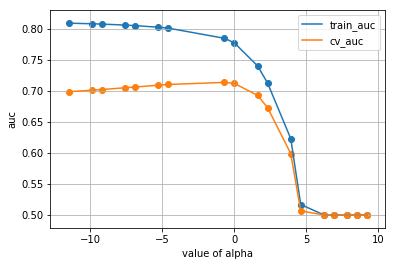

In [105]:
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()

#### best alpha is 0.5 from this graph

In [181]:
y_train_pred=[]
y_test_pred=[]
best_alpha=0.5
clf=MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
clf.fit(train_bow,y_train)
y_train_pred.extend(clf.predict_proba(train_bow)[:,1])
y_test_pred.extend(clf.predict_proba(test_bow)[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test,thresholds_train=roc_curve(y_test,y_test_pred)

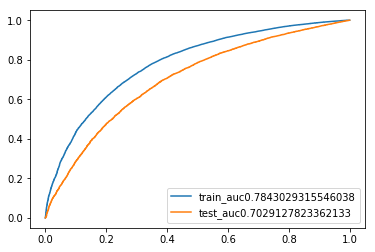

In [182]:
plt.plot(fpr_train,tpr_train,label='train_auc'+str(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test_auc'+str(auc(fpr_test,tpr_test)))
plt.legend()

### Confusion Matrix

In [183]:
from sklearn.metrics import confusion_matrix
print('Train Confusion Matrix')
print(confusion_matrix(y_train,clf.predict(train_bow)))
print('Test Confusion Matrix')
print(confusion_matrix(y_test,clf.predict(test_bow)))

Train Confusion Matrix
[[ 7428  2925]
 [16813 41657]]
Test Confusion Matrix
[[ 3124  1938]
 [ 8469 19243]]


#### Confusion Matrix of Train data

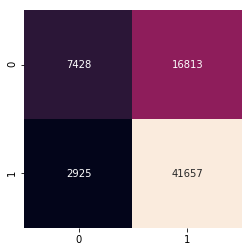

In [184]:
import seaborn as sns
mat=confusion_matrix(y_train,clf.predict(train_bow))
sns.heatmap(mat.T,square=True,annot=True,fmt='d',\
cbar=False)

##### Confusion Matrix on Test data

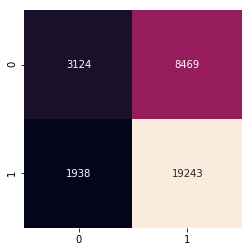

In [185]:
#  pythondatascience handbook o'reilly book
mat=confusion_matrix(y_test,clf.predict(test_bow))
sns.heatmap(mat.T,square=True,annot=True,fmt='d',\
cbar=False)

#### 2.4.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

In [186]:
# Please write all the code with proper documentatcuion
clf=MultinomialNB(alpha=0.5,class_prior=[0.5,0.5])
clf.fit(train_bow,y_train)

MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5], fit_prior=True)

In [187]:
feature_prob=[] #store probability of feature
feature_names=[] #store feature names 

for cur_feature in range(train_bow.shape[1]):
    feature_prob.append(clf.feature_log_prob_[1,cur_feature])#collecting only postive feature probability
def feature_append(data):
    """Getting Features from data for probability"""
    for a in data:
        feature_names.append(a)
feature_append(teacher_pre_feature_name)
feature_append(school_state_feature_name)
feature_append(grade_feature_name)
feature_append(categories_feature_name)
feature_append(subcategories_feature_name)
feature_names.append('price')
feature_append(bow_essay_feature_name)
feature_append(bow_title_feature_name)
print(len(feature_prob))
print(len(feature_names))

16147
16147


In [188]:
bow_feature=pd.DataFrame({'feature_prob':feature_prob,'feature_names':feature_names})
sorted_feature=bow_feature.sort_values(by=['feature_prob'])

In [189]:
sorted_feature.head(20) #Top 20 positive word/categorical feature 

,feature_prob,feature_names
0,-16.724248,Dr.
59,-16.724248,PreK-2
2,-16.724248,Mr.
3,-16.724248,Ms.
4,-16.724248,Mrs.
58,-16.724248,3-5
57,-16.724248,6-8
56,-16.724248,9-12
985,-14.527023,archive
1446,-14.326353,behaving


#### 2.4.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [192]:
# Please write all the code with proper documentation
clf=MultinomialNB(alpha=0.5,class_prior=[0.5,0.5])
clf.fit(train_bow,y_train)
feature_prob=[]
feature_names=[]
for cur_feature in range(train_bow.shape[1]):
    feature_prob.append(clf.feature_log_prob_[0,cur_feature])
def feature_append(data):
    for a in data:
        feature_names.append(a)
feature_append(teacher_pre_feature_name)
feature_append(school_state_feature_name)
feature_append(grade_feature_name)
feature_append(categories_feature_name)
feature_append(subcategories_feature_name)
feature_names.append('price')
feature_append(bow_essay_feature_name)
feature_append(bow_title_feature_name)
print(len(feature_prob))
print(len(feature_names))


16147
16147


In [193]:
bow_feature=pd.DataFrame({'feature_prob':feature_prob,'feature_names':feature_names})
sorted_feature=bow_feature.sort_values(by=['feature_prob'])
sorted_feature.head(20) #Top 20 negative words/categories feature

,feature_prob,feature_names
0,-14.936947,Dr.
2746,-14.936947,con
793,-14.936947,ambulatory
13759,-14.936947,windmills
9738,-14.936947,prohibitive
13749,-14.936947,williams
9770,-14.936947,pronounced
9776,-14.936947,propaganda
1847,-14.936947,budgeted
13726,-14.936947,wiesel


### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [194]:

train_tfidf=hstack((teacher_prefix_one_hot_train,school_state_one_hot_train,\
grade_cat_one_hot_train,categories_one_hot_train,subcategories_one_hot_train,price_one_hot_train,\
tfidf_train_essay,tfidf_train_title)).tocsr()
cv_tfidf=hstack((teacher_prefix_one_hot_cv,school_state_one_hot_cv,\
grade_cat_one_hot_cv,categories_one_hot_cv,subcategories_one_hot_cv,price_one_hot_cv,\
tfidf_cv_essay,tfidf_cv_title)).tocsr()

test_tfidf=hstack((teacher_prefix_one_hot_test,school_state_one_hot_test,\
grade_cat_one_hot_test,categories_one_hot_test,subcategories_one_hot_test,price_one_hot_test,\
tfidf_test_essay,tfidf_test_title)).tocsr()
print(train_tfidf.shape)
print(cv_tfidf.shape)
print(test_tfidf.shape)

(68823, 16147)
(7648, 16147)
(32774, 16147)


In [197]:
alpha=[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.5,1,5,10,50,100,500,1000,2500,5000,10000]
y_train_pred=[]
y_cv_pred=[]
train_auc=[]
cv_auc=[]
log_alpha=[]
for al in alpha:
    log_alpha.append(math.log(al))
for a in tqdm(alpha):
    y_train_pred=[]
    y_cv_pred=[]
    model=MultinomialNB(alpha=a,class_prior=[0.5,0.5])
    model.fit(train_bow,y_train)
    y_train_pred.extend(model.predict_proba(train_bow)[:,1])
    y_cv_pred.extend(model.predict_proba(cv_bow)[:,1])
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

100%|██████████| 18/18 [00:02<00:00,  8.19it/s]


[-11.512925464970229, -9.903487552536127, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 6.214608098422191, 6.907755278982137, 7.824046010856292, 8.517193191416238, 9.210340371976184]


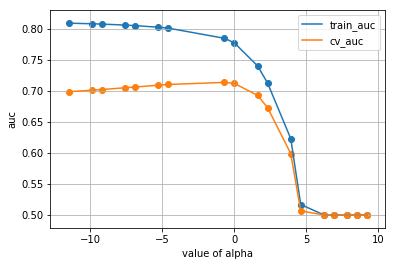

[1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]


In [200]:
print(log_alpha)
plt.plot(log_alpha,train_auc,label='train_auc')
plt.plot(log_alpha,cv_auc,label='cv_auc')
plt.legend()
plt.scatter(log_alpha,train_auc)
plt.scatter(log_alpha,cv_auc)
plt.grid()
plt.ylabel('auc')
plt.xlabel('value of alpha')
plt.show()
print(alpha)

In [246]:
y_train_pred=[]
y_test_pred=[]
best_alpha=1
model=MultinomialNB(alpha=best_alpha,class_prior=[0.5,0.5])
model.fit(train_bow,y_train)
y_train_pred.extend(model.predict_proba(train_bow)[:,1])
y_test_pred.extend(model.predict_proba(test_bow)[:,1])
fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test,thresholds_train=roc_curve(y_test,y_test_pred)

Text(0.5,0,'Auc')

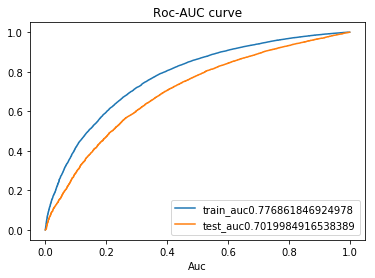

In [247]:
plt.plot(fpr_train,tpr_train,label='train_auc'+str(auc(fpr_train,tpr_train)))
plt.plot(fpr_test,tpr_test,label='test_auc'+str(auc(fpr_test,tpr_test)))
plt.legend()
plt.title('Roc-AUC curve')
plt.xlabel('Auc')

In [248]:
train_tfidf.shape

(68823, 16147)

In [249]:
from sklearn.metrics import confusion_matrix
print('Train Confusion Matrix')
print(confusion_matrix(y_train,model.predict(train_tfidf)))
print('Test Confusion Matrix')
print(confusion_matrix(y_test,model.predict(test_tfidf)))

Train Confusion Matrix
[[ 8329  2024]
 [25246 33224]]
Test Confusion Matrix
[[ 3589  1473]
 [12540 15172]]


#### Test data confusion Matrix

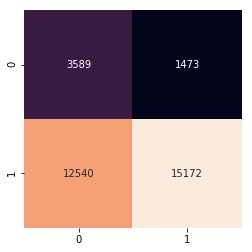

In [250]:
mat=confusion_matrix(y_test,model.predict(test_tfidf))
sns.heatmap(mat,square=True,annot=True,fmt='d',\
cbar=False)

#### Train data confusion Matrix

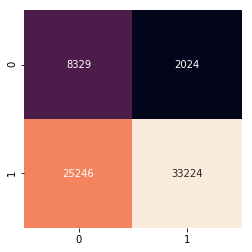

In [251]:
mat=confusion_matrix(y_train,model.predict(train_tfidf))
sns.heatmap(mat,square=True,annot=True,fmt='d',\
cbar=False)

#### 2.4.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [171]:
#https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
clf=MultinomialNB(alpha=0.663)
clf.fit(train_tfidf,y_train)
feature_prob=[]
feature_names=[]
for cur_feature in range(train_tfidf.shape[1]):
    feature_prob.append(clf.feature_log_prob_[1,cur_feature])
def feature_append(data):
    for a in data:
        feature_names.append(a)
feature_append(teacher_pre_feature_name)
feature_append(school_state_feature_name)
feature_append(grade_feature_name)
feature_append(categories_feature_name)
feature_append(subcategories_feature_name)
feature_names.append('price')
feature_append(tfidf_essay_feature)
feature_append(tfidf_title_feature)
print(len(feature_prob))
print(len(feature_names))

16147
16147


In [172]:

bow_feature=pd.DataFrame({'feature_prob':feature_prob,'feature_names':feature_names})
sorted_feature=bow_feature.sort_values(by=['feature_prob'])
sorted_feature.head(20)

,feature_prob,feature_names
0,-14.156362,Dr.
57,-14.156362,6-8
2,-14.156362,Mr.
3,-14.156362,Ms.
4,-14.156362,Mrs.
58,-14.156362,3-5
59,-14.156362,PreK-2
56,-14.156362,9-12
7343,-13.466578,licensed
985,-13.453304,archive


#### 2.4.2.2 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [173]:

feature_prob=[]
feature_names=[]
for cur_feature in range(train_tfidf.shape[1]):
    feature_prob.append(clf.feature_log_prob_[0,cur_feature])
def feature_append(data):
    for a in data:
        feature_names.append(a)
feature_append(teacher_pre_feature_name)
feature_append(school_state_feature_name)
feature_append(grade_feature_name)
feature_append(categories_feature_name)
feature_append(subcategories_feature_name)
feature_names.append('price')
feature_append(tfidf_essay_feature)
feature_append(tfidf_title_feature)
print(len(feature_prob))
print(len(feature_names))

16147
16147


In [174]:
bow_feature=pd.DataFrame({'feature_prob':feature_prob,'feature_names':feature_names})
sorted_feature=bow_feature.sort_values(by=['feature_prob'])
sorted_feature.head(20)

,feature_prob,feature_names
0,-12.464401,Dr.
4309,-12.464401,emilia
14445,-12.464401,cube
14444,-12.464401,cubby
8620,-12.464401,onenote
4614,-12.464401,evil
7578,-12.464401,magee
6145,-12.464401,horns
12427,-12.464401,teased
1149,-12.464401,attachments


<h1>3. Conclusions</h1>

In [177]:

from prettytable import PrettyTable
table=PrettyTable()
table.field_names=['vectorize','HyperParameter(Alpha)','AUC-Train','AUC-Test']
table.add_row(['BOW',"0.5","0.78","0.70"])
table.add_row(['TFIDF',"0.66","0.78","0.70"])

In [178]:
print(table)

+-----------+-----------------------+-----------+----------+
| vectorize | HyperParameter(Alpha) | AUC-Train | AUC-Test |
+-----------+-----------------------+-----------+----------+
|    BOW    |          0.5          |    0.78   |   0.70   |
|   TFIDF   |          0.66         |    0.78   |   0.70   |
+-----------+-----------------------+-----------+----------+
